# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import random

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
file_path = r'Temp_States.csv'

temp = pd.read_csv(file_path)

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
print(temp.dtypes)


City            object
State           object
Temperature    float64
dtype: object


#### Select the rows where state is New York

In [10]:
newyork = temp[temp['State'] == 'New York']
print(newyork)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [11]:
newyork['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [15]:
warmcities = temp[temp['Temperature'] > 15]
print(warmcities)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [17]:
print(warmcities['City'])

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [30]:
mild = temp[(temp['Temperature'] > 15) & temp['Temperature'] < 20]

print(mild)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


In [31]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [36]:
states_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
print(states_stats)



                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [41]:
employee = pd.read_csv(r'employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [53]:
print(employee.dtypes)
print(employee.head())

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object
     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

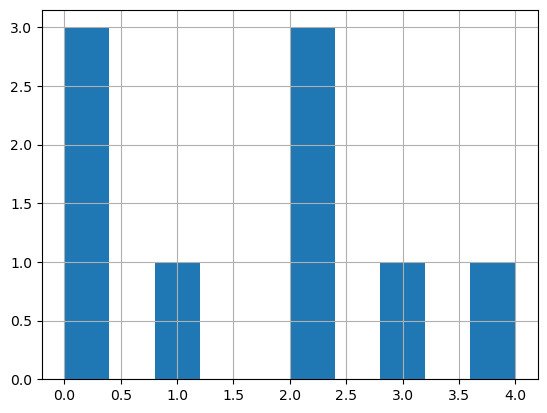

In [51]:
freq = employee['Years'] & employee['Salary']
freq.hist()
plt.show()

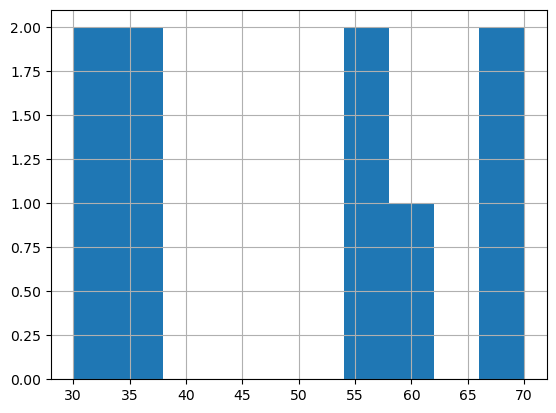

In [52]:
employee['Salary'].hist()
plt.show()

#### What's the average salary in this company?

In [61]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [63]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [64]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [70]:
poor = employee[employee['Salary'] == employee['Salary'].min()]
print(poor['Name'])
 

1    Maria
2    David
Name: Name, dtype: object


#### Could you give all the information about an employee called David?

In [75]:
davids = employee[employee['Name'] == 'David']

print(davids)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [77]:
print(davids['Salary'])

2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [78]:
associates = employee[employee['Title'] == 'associate']
print(associates)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [81]:
print(employee[:2])  

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30


In [83]:
print(employee.head(3))  

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [86]:
associates2 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

print(associates2)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


In [ ]:
# YOUR CODE HERE

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [95]:
employee.groupby('Years')['Salary'].mean()


Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [96]:
employee.groupby('Title')['Salary'].mean()


Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

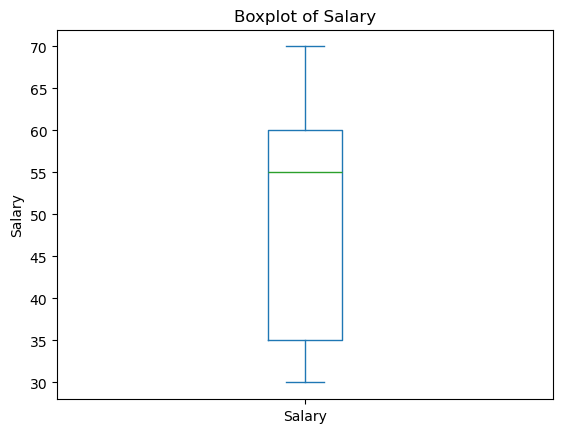

In [97]:
import matplotlib.pyplot as plt
 
plt.figure
employee['Salary'].plot(kind='box')
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.show()



In [103]:

 
summary_stats = employee['Salary'].describe()

first_quartile = summary_stats['25%']
print("First Quartile:", first_quartile)


First Quartile: 35.0


In [32]:
# print first quartile here

35.0

In [102]:
third_quartile = summary_stats['75%']
print("Third Quartile:", third_quartile)

Third Quartile: 60.0


#### Is the mean salary per gender different?

In [104]:
employee.groupby('Gender')['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [108]:
numeric = employee.select_dtypes(include=['int64', 'float64']).columns
employee.groupby('Department')[numeric].agg(['mean', 'min', 'max'])

Years         Salary        
                mean min max   mean min max
Department                                 
HR          4.666667   2   8  45.00  30  70
IT          4.500000   1   8  48.75  30  70
Sales       2.500000   2   3  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [113]:
calculation = lambda x: x.max() - x.min()
salary_difference_per_department = employee.groupby('Department')['Salary'].agg(calculation)
print(salary_difference_per_department)
 

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [116]:
orders = pd.read_csv('Orders.csv')
print(orders.head())

   Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
0           0     536365    85123A  2010     12    3     8   
1           1     536365     71053  2010     12    3     8   
2           2     536365    84406B  2010     12    3     8   
3           3     536365    84029G  2010     12    3     8   
4           4     536365    84029E  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   
4       red woolly hottie white heart.         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  amount_spent  
0       2.55       17850  United Kingdom         15.30  
1       3.39       17850  United Kingdom         20.34  
2       2.75     

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [118]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [120]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [121]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [122]:
orders['amount_spent'].min()


0.0

In [123]:
orders['amount_spent'].max()



168469.6

#### Select all the customers we have in Spain

In [128]:
spanish = orders[orders['Country'] == 'Spain']
print(spanish)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  20

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [130]:
orders['Country'].value_counts()['Spain']


2485

#### Select all the customers who have bought more than 50 items ?

In [140]:
counter = orders.groupby('CustomerID')['Quantity'].sum()
freq = counter[counter > 50].index
print(freq)


Index([12346, 12347, 12348, 12349, 12350, 12352, 12354, 12355, 12356, 12357,
       ...
       18272, 18273, 18274, 18276, 18277, 18278, 18281, 18282, 18283, 18287],
      dtype='int64', name='CustomerID', length=4091)


#### Select orders from Spain that are above 50 items

In [144]:
spainbig = spanish[spanish['Quantity'] > 50]
print(spainbig)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
174443      248798     558871     20727  2011      7    1    1

#### Select all free orders

In [146]:
frees = orders[orders['amount_spent'] == 0]
print(frees)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [148]:
lunch = orders[orders['Description'].str.contains('lunch bag')]
print(lunch)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [155]:
lunch11 = lunch[lunch['year'] == 2011]  
print(lunch11)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
26341            lunch bag woodla

#### Show the frequency distribution of the amount spent in Spain.

(array([2.428e+03, 3.900e+01, 9.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00]),
 array([   0.,  135.,  270.,  405.,  540.,  675.,  810.,  945., 1080.,
        1215., 1350.]),
 <BarContainer object of 10 artists>)

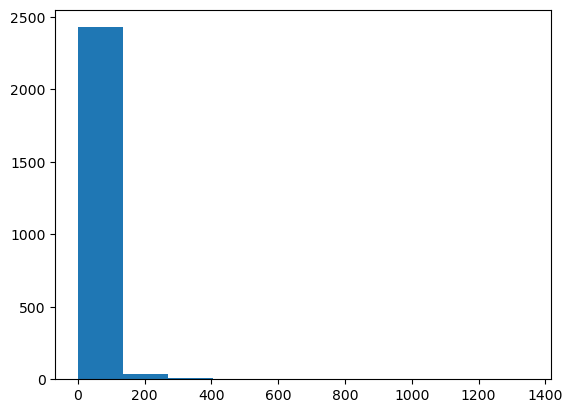

In [159]:
plt.figure
plt.hist(spanish['amount_spent'])

#### Select all orders made in the month of August

In [164]:
orders['InvoiceDate'] = pd.to_datetime(orders['InvoiceDate'])
august = orders[orders['InvoiceDate'].dt.month == 8]
print(august)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity         InvoiceDate  \
199475         6 ribbons elegant christmas         96 2011-08-01 08:30:00   
199476            scandinavian reds ribbo

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [168]:
august.groupby('Country').value_counts()


Country      Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  amount_spent
Australia    299898      563179     23268      2011  8      5    14    set of 2 ceramic christmas reindeer  12        2011-08-12 14:19:00  1.45       12431       17.40           1
             299899      563179     23344      2011  8      5    14    jumbo bag 50's christmas             10        2011-08-12 14:19:00  2.08       12431       20.80           1
             304915      563614     22423      2011  8      4    8     regency cakestand 3 tier             32        2011-08-18 08:51:00  10.95      12415       350.40          1
             304939      563614     22619      2011  8      4    8     set of 6 soldier skittles            160       2011-08-18 08:51:00  3.39       12415       542.40          1
             304938      563614     22749      2011  8      4    8     feltcraft princess charlotte doll 

#### What's the  average amount of money spent by country

In [172]:
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [173]:
orders['amount_spent'].max()

168469.6

In [176]:
sort = orders.sort_values(by='amount_spent', ascending = False)
print(sort[:1])

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
397451      540421     581483     23843  2011     12    5     9   

                        Description  Quantity         InvoiceDate  UnitPrice  \
397451  paper craft , little birdie     80995 2011-12-09 09:15:00       2.08   

        CustomerID         Country  amount_spent  
397451       16446  United Kingdom      168469.6  


#### What was the average amount spent per year ?

In [180]:
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64